# Breast Cancer Detection based on Histopathology Images

## About the Data:

- **Data Source:** https://www.kaggle.com/code/nasrulhakim86/breast-cancer-histopathology-images-classification/data
- The Breast Cancer Histopathological Image Classification (BreakHis) is composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients.
- The images are collected using different magnifying factors (40X, 100X, 200X, and 400X). 
- To date, it contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format).
- This database has been built in collaboration with the P&D Laboratory – Pathological Anatomy and Cytopathology, Parana, Brazil (http://www.prevencaoediagnose.com.br). 
- Each image filename stores information about the image itself: method of procedure biopsy, tumor class, tumor type, patient identification, and magnification factor. 
- For example, SOBBTA-14-4659-40-001.png is the image 1, at magnification factor 40X, of a benign tumor of type tubular adenoma, original from the slide 14-4659, which was collected by procedure SOB.

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import shutil


### Prepare directories

In [2]:
zoom = 400

cwd = Path().absolute()
input_path = cwd / 'breakhis'
output_path = cwd / f'breakhis_{zoom}x'


In [3]:
shutil.rmtree(output_path, ignore_errors=True)


In [4]:
os.makedirs(output_path)
os.makedirs(output_path / 'benign')
os.makedirs(output_path / 'malignant')


### Load data

In [5]:
input_data_df = pd.read_csv(input_path / 'Folds.csv')


In [6]:
input_data_df = input_data_df.rename(columns={"filename": "path"})
input_data_df.head(3)
len(input_data_df)


39545

In [7]:
input_data_df['path'][1]


'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

In [8]:
input_data_df['filename'] = input_data_df['path'].apply(
    lambda x: x.split("/")[-1])
input_data_df["label"] = input_data_df['path'].apply(lambda x: x.split("/")[3])
input_data_df["patient_id"] = input_data_df['path'].apply(
    lambda x: x.split("/")[-3])


In [9]:
input_data_df = input_data_df[input_data_df.mag == zoom]


In [10]:
input_data_df.head(3)
len(input_data_df)


9100

### Copy data to new directory

- The given data consists of very complex structure of folders where it stores the images.
- The structure as follows:
    - BreaKHis_v1
        - histology_slides
            - breast
                - **benign**
                    - **SOB**
                        - Type
                            - **patient_id**  
                                - 40x
                                - 100x
                                - 200x
                                - 400x
                - **malignant**
                    - **SOB**
                        - Type
                            - **patient_id**   
                                - 40x
                                - 100x
                                - 200x
                                - 400x
- To make things simple, using the exact path of the images, all the images are moved to the common folder called **Cancer.**
- Images are renamed with their class and patient_id.
                

In [11]:
for i in range(len(input_data_df)):
    src = input_path / 'BreaKHis_v1' / input_data_df['path'].iloc[i]
    dest = output_path / \
        input_data_df["label"].iloc[i] / str(src).split("/")[-1]
    shutil.copyfile(src, dest)


In [12]:
print(f"Benign: {len(os.listdir(output_path / 'benign'))}")
print(f"Malignant: {len(os.listdir(output_path / 'malignant'))}")


Benign: 588
Malignant: 1232


- All the images are now stores in single folder.

In [13]:
input_data_df['file_loc'] = input_data_df['label'] + \
    "_" + input_data_df['filename']
input_data_df['class'] = input_data_df['label'].apply(
    lambda x: 0 if x == 'benign' else 1)


In [14]:
input_data_df.head(3)

,fold,mag,grp,path,filename,label,patient_id,file_loc,class
91,1,400,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-400-001.png,benign,SOB_B_A_14-22549AB,benign_SOB_B_A-14-22549AB-400-001.png,0
92,1,400,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-400-002.png,benign,SOB_B_A_14-22549AB,benign_SOB_B_A-14-22549AB-400-002.png,0
93,1,400,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-400-003.png,benign,SOB_B_A_14-22549AB,benign_SOB_B_A-14-22549AB-400-003.png,0


Text(0.5, 1.0, "Liczebność próbek 'benign' i 'malignant' (powiększenie 400x)")

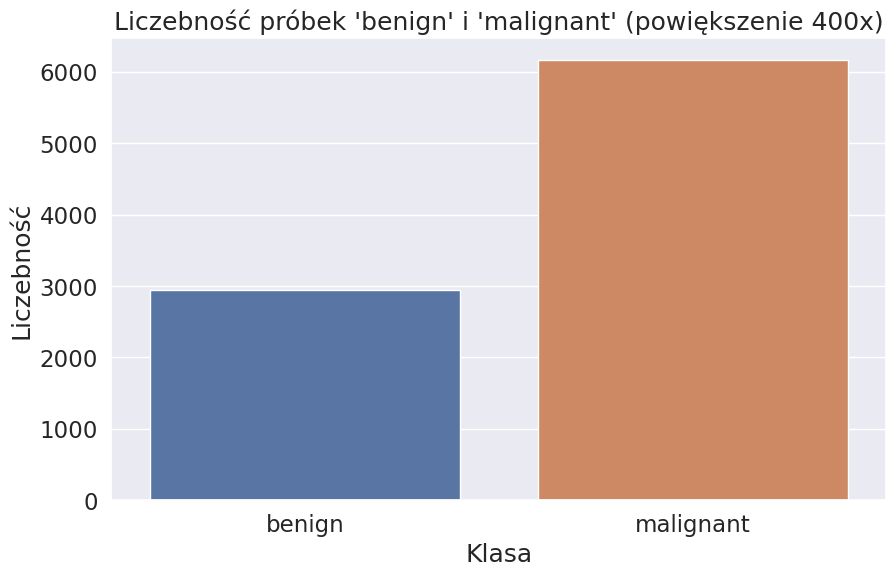

In [15]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.countplot(x=input_data_df[input_data_df.mag == zoom]['label'])
plt.xlabel("Klasa")
plt.ylabel("Liczebność")
plt.title(f"Liczebność próbek 'benign' i 'malignant' (powiększenie {zoom}x)")


- Data is Highly Imabalanced as this is the case with the real world.
- Medical datas are usually imbalanced because of their nature.

In [16]:
benign_df = input_data_df[input_data_df['label'] == 'benign']
malignant_df = input_data_df[input_data_df['label'] == 'malignant']


### Benign Samples

In [17]:
plt.figure(figsize=(30, 10))
for i in range(0, 40):
    plt.subplot(4, 10, i+1)
    img = cv2.imread(os.path.join(
        output_path, benign_df['label'].iloc[i], benign_df['filename'].iloc[i]), 1)
    plt.imshow(img)


### Malignant Samples

In [18]:
plt.figure(figsize=(30, 10))
for i in range(0, 40):
    plt.subplot(4, 10, i+1)
    img = cv2.imread(os.path.join(
        output_path, malignant_df['label'].iloc[i], malignant_df['filename'].iloc[i]), 1)
    plt.imshow(img)


**Findings:**

- From the above images there is very little to no difference between malignant and benign samples.
- This might be because we are not the pathologists, That's the original purpose of the detection system.
- Thus it makes it easy in the absence of actual pathologists.

In [19]:
# Creating a new data frame with the file loc as its index, label and class of the patients as its columns.
benign_files = os.listdir(output_path / 'benign')
benign_files = [f"breakhis_{zoom}x/benign/" +
                file_name for file_name in benign_files]
malignant_files = os.listdir(output_path / 'malignant')
malignant_files = [f"breakhis_{zoom}x/malignant/" +
                   file_name for file_name in malignant_files]

df = pd.DataFrame(benign_files + malignant_files)
df = df.rename(columns={0: 'file_loc'})
df.head()
df['label'] = df['file_loc'].apply(
    lambda x: 0 if x.split('/')[-1].split("_")[1] == 'B' else 1)
df['label_str'] = df['file_loc'].apply(
    lambda x: "benign" if x.split('/')[-1].split("_")[1] == 'B' else "malignant")

df['patient_id'] = df['file_loc'].apply(
    lambda x: "-".join(x.split("-")[:3]).split("/")[-1])
df.set_index("file_loc", inplace=True)

df.head(5)

,label,label_str,patient_id
file_loc,,,
breakhis_400x/benign/SOB_B_TA-14-13200-400-014.png,0,benign,SOB_B_TA-14-13200
breakhis_400x/benign/SOB_B_TA-14-21978AB-400-012.png,0,benign,SOB_B_TA-14-21978AB
breakhis_400x/benign/SOB_B_PT-14-21998AB-400-030.png,0,benign,SOB_B_PT-14-21998AB
breakhis_400x/benign/SOB_B_PT-14-29315EF-400-001.png,0,benign,SOB_B_PT-14-29315EF
breakhis_400x/benign/SOB_B_TA-14-13200-400-005.png,0,benign,SOB_B_TA-14-13200


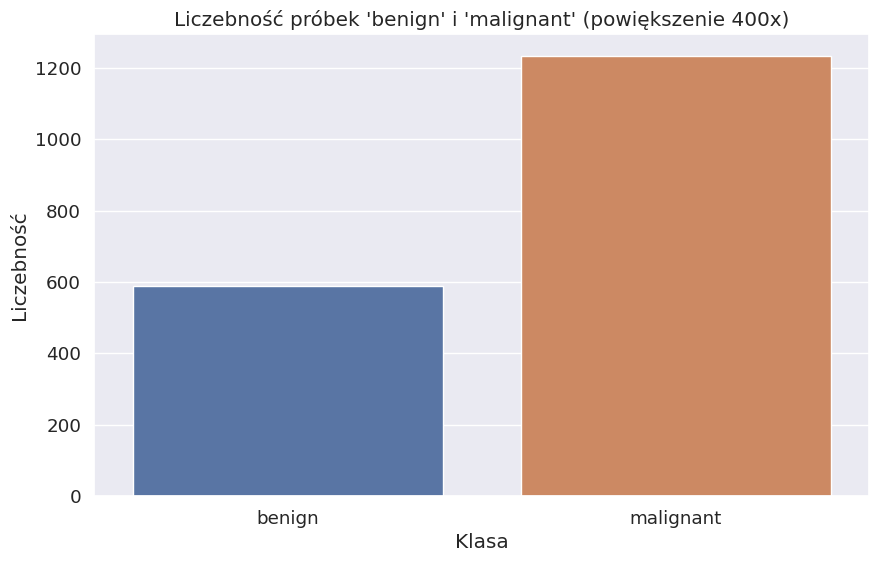

In [20]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
sns.countplot(x=df['label_str'])
plt.xlabel("Klasa")
plt.ylabel("Liczebność")
plt.title(f"Liczebność próbek 'benign' i 'malignant' (powiększenie {zoom}x)")
plt.savefig(f"/home/miki/Downloads/count_plot_{zoom}x.png")

In [21]:
import numpy as np
from collections import Counter
from sklearn.utils import shuffle


def map_nested_indices(nested_indices, original_indices):
    return original_indices[nested_indices]


class StratifiedGroupKFold:
    def __init__(self, n_splits=3, random_state=None):
        self.n_splits = n_splits
        self.random_state = random_state
        self.used_group_ids = []

    def _fill_bucket(self, bucket, class_counts, group_ids, y):
        for group_id, label in zip(group_ids, y):
            if group_id in self.used_group_ids:
                continue
            if class_counts[label] > 0:
                group_indices = np.where(group_ids == group_id)[0]
                bucket[label].extend(group_indices)
                class_counts[label] -= len(group_indices)
                self.used_group_ids.append(group_id)

    def _create_buckets(self, group_ids, y, class_ratios):
        total_samples = len(group_ids)
        samples_per_split = total_samples // self.n_splits

        buckets = []
        for _ in range(self.n_splits):
            bucket = {label: [] for label in class_ratios.keys()}
            class_counts = {label: int(samples_per_split * ratio)
                            for label, ratio in class_ratios.items()}
            self._fill_bucket(bucket, class_counts, group_ids, y)
            buckets.append(bucket)

        return buckets

    def _rotate_buckets(self, buckets):
        return buckets[-1:] + buckets[:-1]

    def _get_indices(self, bucket, group_ids, y):
        indices = []
        for label, groups in bucket.items():
            for group in groups:
                group_indices = np.where(group_ids == group)[0]
                label_indices = np.where(y == label)[0]
                indices.extend(np.intersect1d(group_indices, label_indices))
        return np.array(indices)

    def split(self, X, y, group_ids):
        index_map = np.arange(len(y))
        group_ids_s, y_s, index_map = shuffle(
            group_ids, y, index_map, random_state=self.random_state)

        class_ratios = {label: count / len(y)
                        for label, count in Counter(y).items()}
        buckets = self._create_buckets(group_ids_s, y_s, class_ratios)

        for _ in range(self.n_splits):
            train_buckets = buckets[1:]
            test_bucket = buckets[0]

            train_indices = np.concatenate(
                [np.array(bucket[label]) for bucket in train_buckets for label in bucket])
            test_indices = np.concatenate(
                [np.array(test_bucket[label]) for label in test_bucket])

            # Map shuffled indices to original ones
            train_indices = index_map[train_indices]
            test_indices = index_map[test_indices]

            assert len(np.intersect1d(
                np.unique(group_ids[train_indices]), np.unique(group_ids[test_indices]))) == 0

            yield train_indices, test_indices
            buckets = self._rotate_buckets(buckets)


In [22]:
files = df['label']
labels = df['label']
patient_ids = df['patient_id']

sgfk = StratifiedGroupKFold(n_splits=5, random_state=42)
train_val_index, test_index = next(
    sgfk.split(files, labels, patient_ids))


def filter_train_val_indices(idx, indices):
    return idx in indices


train_val_files = df['label'].iloc[train_val_index]
train_val_labels = df['label'].iloc[train_val_index]
train_val_patient_ids = df['patient_id'].iloc[train_val_index]


In [23]:
n_splits = 5
sgfk = StratifiedGroupKFold(n_splits=5, random_state=42)

folds = sgfk.split(train_val_files, train_val_labels, train_val_patient_ids)


In [24]:
df.iloc[test_index].to_csv(os.path.join(output_path, "test.csv"))


In [25]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

print(f"Zoom: {zoom}x")
m_len = len(df[df.label == 1])
b_len = len(df[df.label == 0])
mp = len(df[df.label == 1]) / len(df)
bp = len(df[df.label == 0]) / len(df)
print(f"All - percent of B vs M samples: {bp:.2f} - {mp:.2f} / liczebność: {b_len} : {m_len}")

m_len = len(df.iloc[test_index][df.iloc[test_index].label == 1])
b_len = len(df.iloc[test_index][df.iloc[test_index].label == 0])
mp = len(df.iloc[test_index][df.iloc[test_index].label == 1]
         ) / len(df.iloc[test_index])
bp = len(df.iloc[test_index][df.iloc[test_index].label == 0]
         ) / len(df.iloc[test_index])
print(f"Test - percent of B vs M samples: {bp:.2f} - {mp:.2f} / liczebność: {b_len} : {m_len}")

for idx, (train_index, val_index) in enumerate(folds):
    print("=============================================")
    print(f"Saving fold {idx}")
    train_index = map_nested_indices(train_index, train_val_index)
    val_index = map_nested_indices(val_index, train_val_index)

    train_val_patient_ids = df.iloc[train_index].patient_id.unique()
    test_patient_ids = df.iloc[val_index].patient_id.unique()

    m_len = len(df.iloc[train_index][df.iloc[train_index].label == 1])
    b_len = len(df.iloc[train_index][df.iloc[train_index].label == 0])
    mp = len(df.iloc[train_index][df.iloc[train_index].label == 1]
             ) / len(df.iloc[train_index])
    bp = len(df.iloc[train_index][df.iloc[train_index].label == 0]
             ) / len(df.iloc[train_index])
    print(f"Train - percent of B vs M samples: {bp:.2f} - {mp:.2f} / liczebność: {b_len} : {m_len}")


    m_len = len(df.iloc[val_index][df.iloc[val_index].label == 1])
    b_len = len(df.iloc[val_index][df.iloc[val_index].label == 0])
    mp = len(df.iloc[val_index][df.iloc[val_index].label == 1]
             ) / len(df.iloc[val_index])
    bp = len(df.iloc[val_index][df.iloc[val_index].label == 0]
             ) / len(df.iloc[val_index])
    print(f"Val - percent of B vs M samples: {bp:.2f} - {mp:.2f} / liczebność: {b_len} : {m_len}")

    df.iloc[train_index].to_csv(os.path.join(
        output_path, f"train_{idx}.csv"))
    df.iloc[val_index].to_csv(os.path.join(
        output_path, f"val_{idx}.csv"))


Zoom: 400x
All - percent of B vs M samples: 0.32 - 0.68 / liczebność: 588 : 1232
Test - percent of B vs M samples: 0.37 - 0.63 / liczebność: 146 : 247
Saving fold 0
Train - percent of B vs M samples: 0.31 - 0.69 / liczebność: 351 : 782
Val - percent of B vs M samples: 0.31 - 0.69 / liczebność: 91 : 203
Saving fold 1
Train - percent of B vs M samples: 0.32 - 0.68 / liczebność: 399 : 830
Val - percent of B vs M samples: 0.22 - 0.78 / liczebność: 43 : 155
Saving fold 2
Train - percent of B vs M samples: 0.30 - 0.70 / liczebność: 336 : 781
Val - percent of B vs M samples: 0.34 - 0.66 / liczebność: 106 : 204
Saving fold 3
Train - percent of B vs M samples: 0.30 - 0.70 / liczebność: 338 : 785
Val - percent of B vs M samples: 0.34 - 0.66 / liczebność: 104 : 200
Saving fold 4
Train - percent of B vs M samples: 0.31 - 0.69 / liczebność: 344 : 762
Val - percent of B vs M samples: 0.31 - 0.69 / liczebność: 98 : 223
